<h1>Predicting Diamond Prices</h1>
<h2>Phase 1: Data Preparation & Visualisation</h2>
<h4>Group Name: Group 15</h4>
<h5>Name: Evelyn Lie (s3951140)</h5>
<h5>Name: Edward Lim Padmajaya (s3957503)</h5>
<h5>Name: Go Chee Kin (s3955624)</h5>

<h2>Table Of Contents</h2>
<ul>
    <li>Introduction</li>
        <ul style = "list-style-type:square">
            <li>Dataset Source</li>
            <li>Dataset Details</li>
            <li>Dataset Variables</li>
            <li>Response Variables</li>
        </ul>
    <li>Goals and Objectives</li>
    <li>Data Cleaning and Preprocessing</li>
    <li>Data Exploration and Visualisation</li>
    <li>Summary and Conclusion</li>
    <li>References</li>
</ul>

<h3><b>Introduction</b></h3>
<h4>Dataset Source</h4>
The Diamonds dataset used in study was obtained from a public repository on Github (Akman, 2022), which was also sourced from the ggplot2 R library. This dataset, which is used to forecast diamond prices, comprises details on diamonds such as their carat, clarity, cut, and color.
<h4>Dataset Details</h4>
The dataset is about the prices of diamonds and contains information about the diamond carat, clarity, cut, and colour of each diamond. Additional features included in this dataset are the total depth percentage, table, length of diamonds in millimetre, width of diamonds in millimetre, and depth of diamonds in millimetre. These features appear to be adequate for an attempt to predict the price of diamonds.

This dataset has a total of 10 features and 53941 observations.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [2]:
df_name = 'diamonds.csv'
df_url = 'https://raw.githubusercontent.com/akmand/datasets/main/diamonds.csv'
url_content = requests.get(df_url, verify = False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
df.sample(10, random_state=999)

,carat,cut,color,clarity,depth,table,x,y,z,price
38848,0.40,Ideal,I,IF,62.2,56.0,4.75,4.71,2.94,1050
9023,1.04,Ideal,H,SI1,61.9,57.0,6.49,6.46,4.01,4515
51799,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,2415
35562,0.35,Premium,G,VS1,61.2,58.0,4.54,4.51,2.77,906
18923,1.49,Very Good,G,SI2,62.5,58.0,7.20,7.26,4.52,7773
53847,0.71,Ideal,H,VVS1,60.8,56.0,5.75,5.83,3.52,2741
848,0.72,Ideal,H,VVS2,60.9,57.0,5.79,5.77,3.52,2869
9756,0.90,Premium,G,VS1,62.7,58.0,6.06,6.15,3.83,4661
15655,1.04,Premium,F,VS2,59.6,62.0,6.62,6.56,3.93,6278
3696,0.72,Very Good,G,VVS2,60.1,60.0,5.79,5.82,3.49,3449


<h4>Dataset Variables</h4>
The features in our dataset are described in the table below and are taken from a RPubs website (Moreno, 2018) where the author also use the same diamonds dataset as our group.

In [3]:
from tabulate import tabulate

table = [
         ['Name', 'Data Type', 'Units', 'Descriptions'],
         ['Carat','Numerical','Carat','Weight of the diamond'],
         ['Cut','Ordinal Categorical','NA','Quality of the cut'],
         ['Color','Ordinal Categorical','NA','Colour of the diamond'],
         ['Clarity','Ordinal Categorical','NA','Measurement of how clear the diamond is'],
         ['Depth','Numerical','Percentage','Total depth percentage (Calculated by dividing the diamond’s total height by its total width)'],
         ['Table','Numerical','Percentage', 'Width of top of diamond relative to widest point (Calculated by dividing the total width of the diamond by the width of the table)'],
         ['x','Numerical','Millimetre','Length of diamond in millimetre'],
         ['y','Numerical','Millimetre','Width of diamond in millimetre'],
         ['z','Numerical','Millimetre','Depth of diamond in millimetre'],
         ['Price','Numerical','USD','Price of diamond in US Dollars'],
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════════════════╤════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units      │ Descriptions                                                                                                                       │
╞═════════╪═════════════════════╪════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Carat   │ Numerical           │ Carat      │ Weight of the diamond                                                                                                              │
├─────────┼─────────────────────┼────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Cut     │ Ordinal Categorical │ NA         │ Quality of the cut                                   

<h4>Response Variable</h4>
Predicting the price of diamonds in Australian dollars will be our primary feature in this project. All of the variables in this dataset will be included in the factors. 

<h3><b>Goals and Objectives</b></h3>
Diamonds have a variety of factors that affects their price. Any little change in one of the factors, increase or decrease, would instantly affect the price. Because of this, a customer should be able to know what factors that might effect the price of the diamond before making a purchase. Other than customers, diamond vendors could also use this prediction model to figure out how much they should charge for a diamond based on its variables.

Thus, predicting the diamond's price in US dollars based on available feature of the diamond is the main goal of this model. In addition, we will also perform some data cleaning and processing, as well as some data exploration and visualization using charts and graphs to gain some insights about the connections between the variables in the dataset, which is the purpose of this Phase 1 report. We will then be able to determine which feature appear to be the most accurate forecasters of the diamond price based on this connection.

<h3><b>Data Cleaning and Preprocessing</b></h3>
This section describes the data cleaning and preprocessing procedures used for this project.
<h4>Data Cleaning</h4>
We examined the dataset for missing values and outliers and decide to remove rows where outliers are present based on the diamond's carat value, meaning for diamonds that are too heavy or light. Please note that all of the features in this dataset are relevant for predicting the price of the diamond as only a slight change will impact the price overall.
<h4>Outlier</h4>

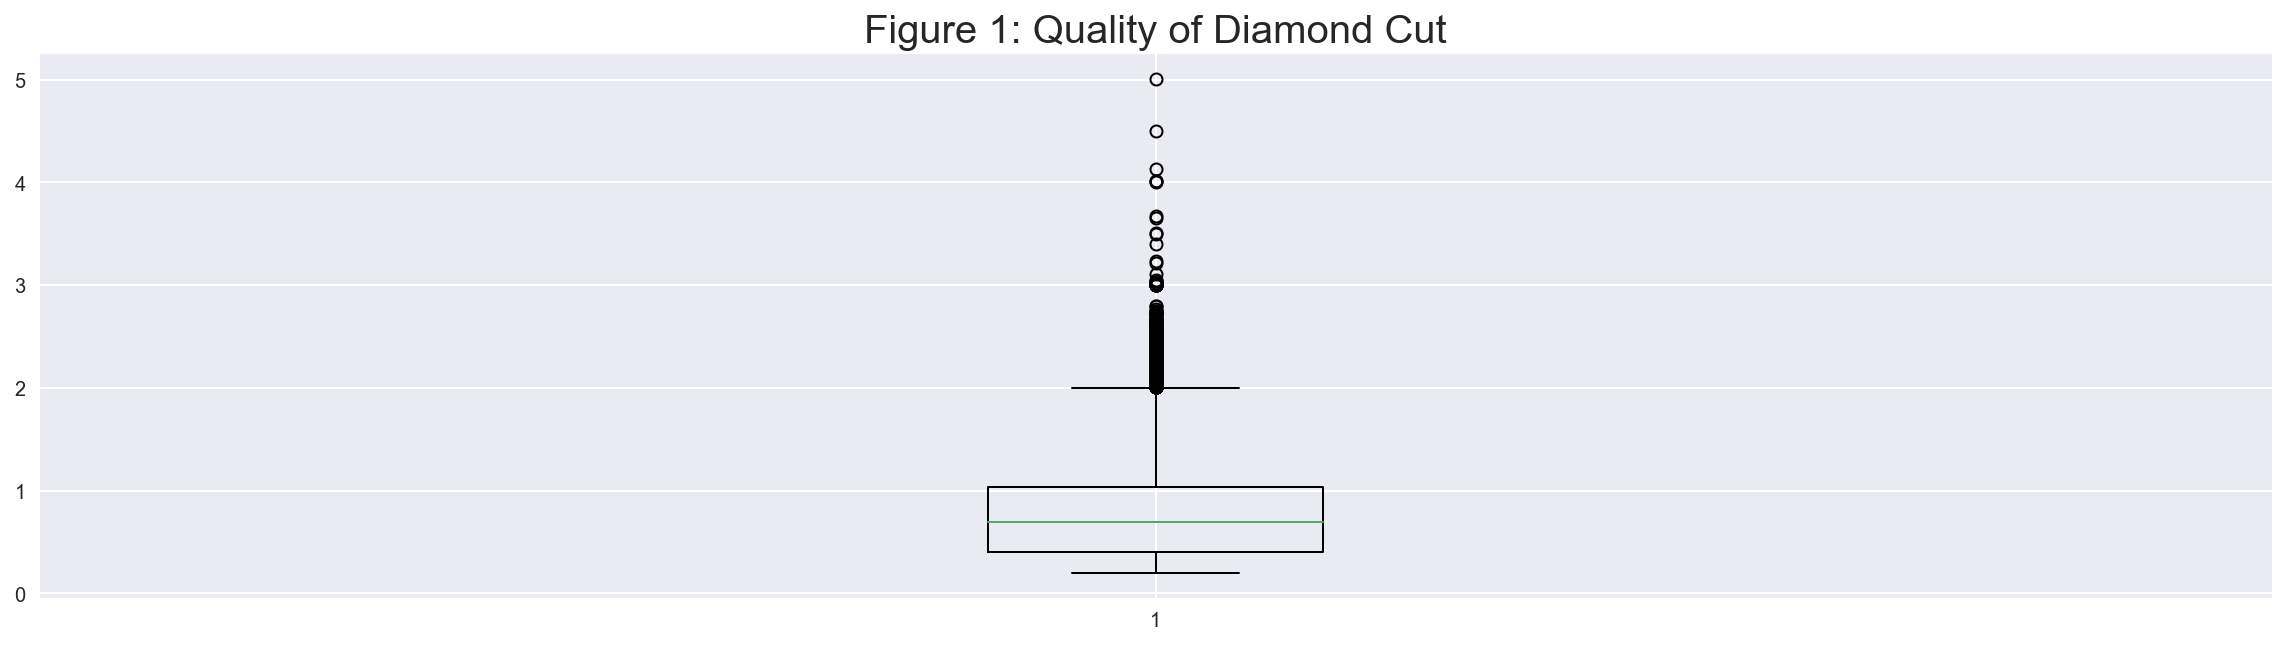

In [4]:
plt.figure(figsize = (20,5))
plt.boxplot(df['carat'])
plt.title('Figure 1: Quality of Diamond Cut', fontsize = 20)
plt.show()

<h5>Missing Value</h5>

In [5]:
print(f"\nNumber of missing values for each column:")
print(df.isnull().sum())


Number of missing values for each column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


However, we decided to rename the column name "x", "y", and "z", to "length", "width" and "depth" respectively because the name "x", "y", and "z" does not give any description on what the column values represent.

In [6]:
df = df.rename(columns = {"x" : "length", "y" : "width", "z" : "depth"})
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth,table,length,width,depth,price
38848,0.40,Ideal,I,IF,62.2,56.0,4.75,4.71,2.94,1050
9023,1.04,Ideal,H,SI1,61.9,57.0,6.49,6.46,4.01,4515
51799,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,2415
35562,0.35,Premium,G,VS1,61.2,58.0,4.54,4.51,2.77,906
18923,1.49,Very Good,G,SI2,62.5,58.0,7.20,7.26,4.52,7773


There are no adjustments required in this data types because the data types of each feature match what we wanted it to be.

In [7]:
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
length     float64
width      float64
depth      float64
price        int64
dtype: object


<h4>Random Sampling</h4>
As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 53941 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [8]:
df = df.sample(n=5000, random_state=999)
df.shape
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth,table,length,width,depth,price
1130,0.73,Ideal,G,VVS2,61.9,55.0,5.83,5.77,3.59,2919
35770,0.40,Very Good,E,VS2,62.9,55.0,4.72,4.73,2.97,912
51365,0.71,Ideal,F,SI2,62.1,54.0,5.73,5.76,3.57,2365
23640,1.51,Premium,F,SI1,60.9,61.0,7.32,7.30,4.45,11666
47626,0.75,Premium,F,SI2,59.8,60.0,5.96,5.92,3.55,1881


<h3><b>Data Exploration and Visualisation</b></h3>
Now that our dataset has been deemed clean, we can begin visualising and examining each of the features.

<h4>Univariate Visualisation</h4>
<h5>BAR CHART OF CUT</h5>
We count the quality cut of the diamond to see which cut is the most common in a descending order. As we can see in Figure 1, the Ideal cut has the highest number of is the most common quality cut in the dataset.

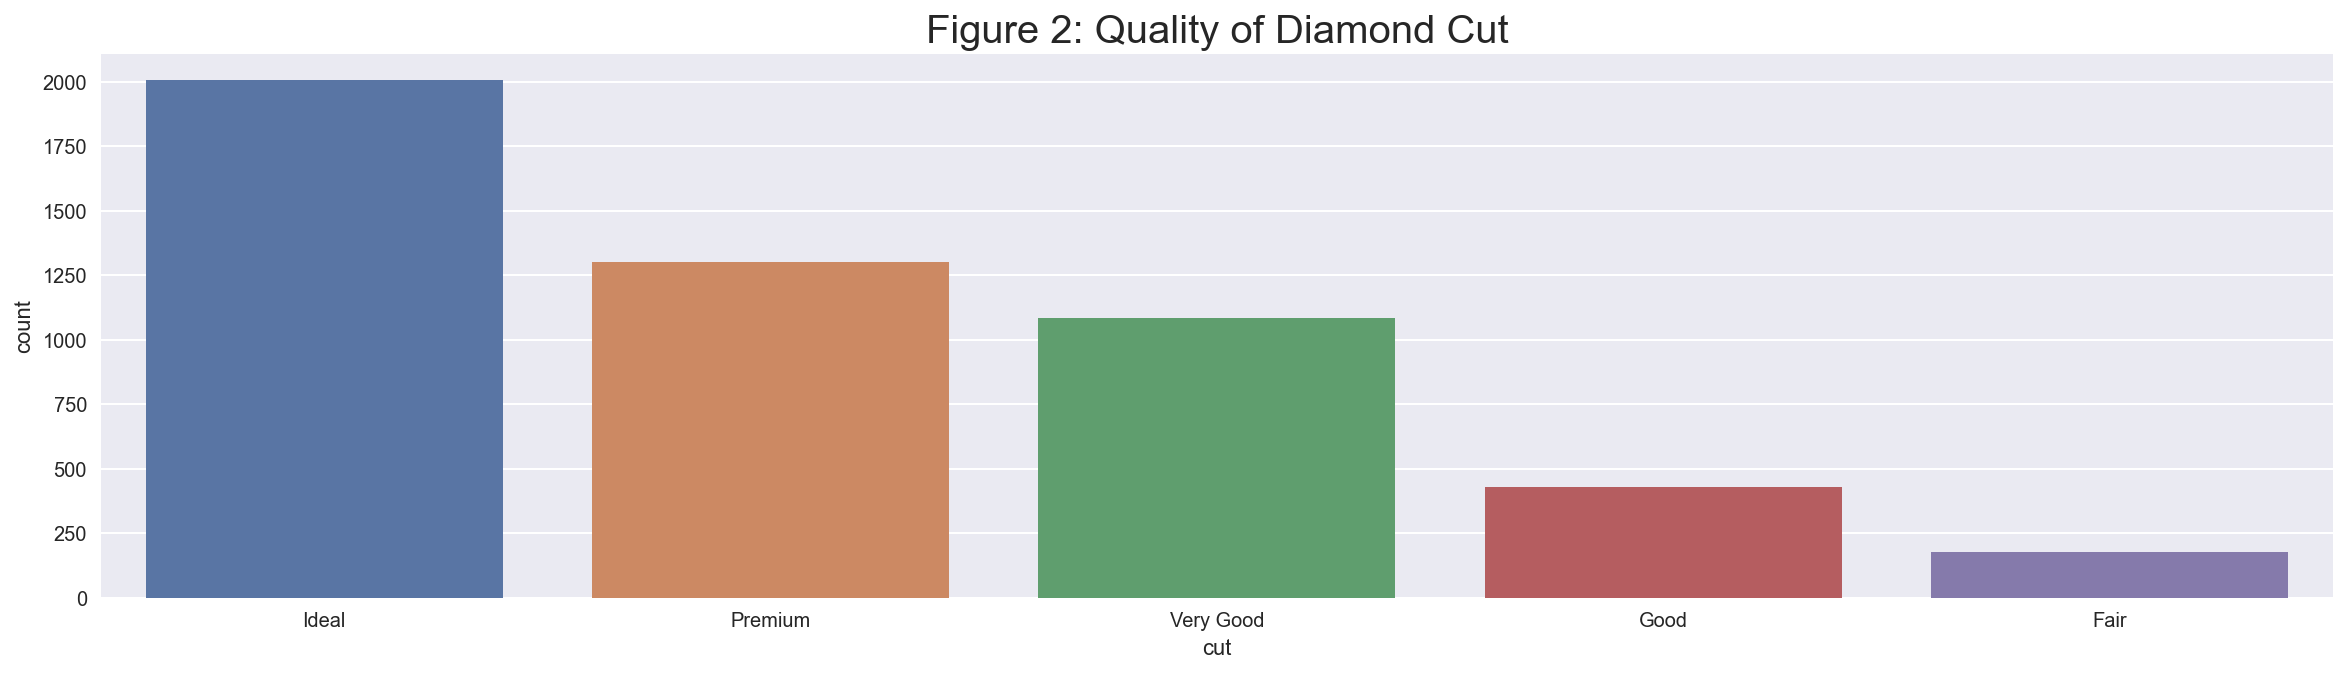

In [9]:
plt.figure(figsize = (20,5))
fig = sns.countplot(x = 'cut', data = df, palette = 'deep', order = df['cut'].value_counts().index)
fig = plt.title('Figure 2: Quality of Diamond Cut', fontsize = 20)
plt.show()

<h4>Two-Variable Visualization</h4>
<h5>BOXPLOT OF PRICE BY DIAMOND COLOUR</h5>
Figure 5 demonstrates how the diamond's colour might affect its price and reveals that the colour grade "J" generally has a higher price than the other varieties, while the colour grade "E" has the lowest.

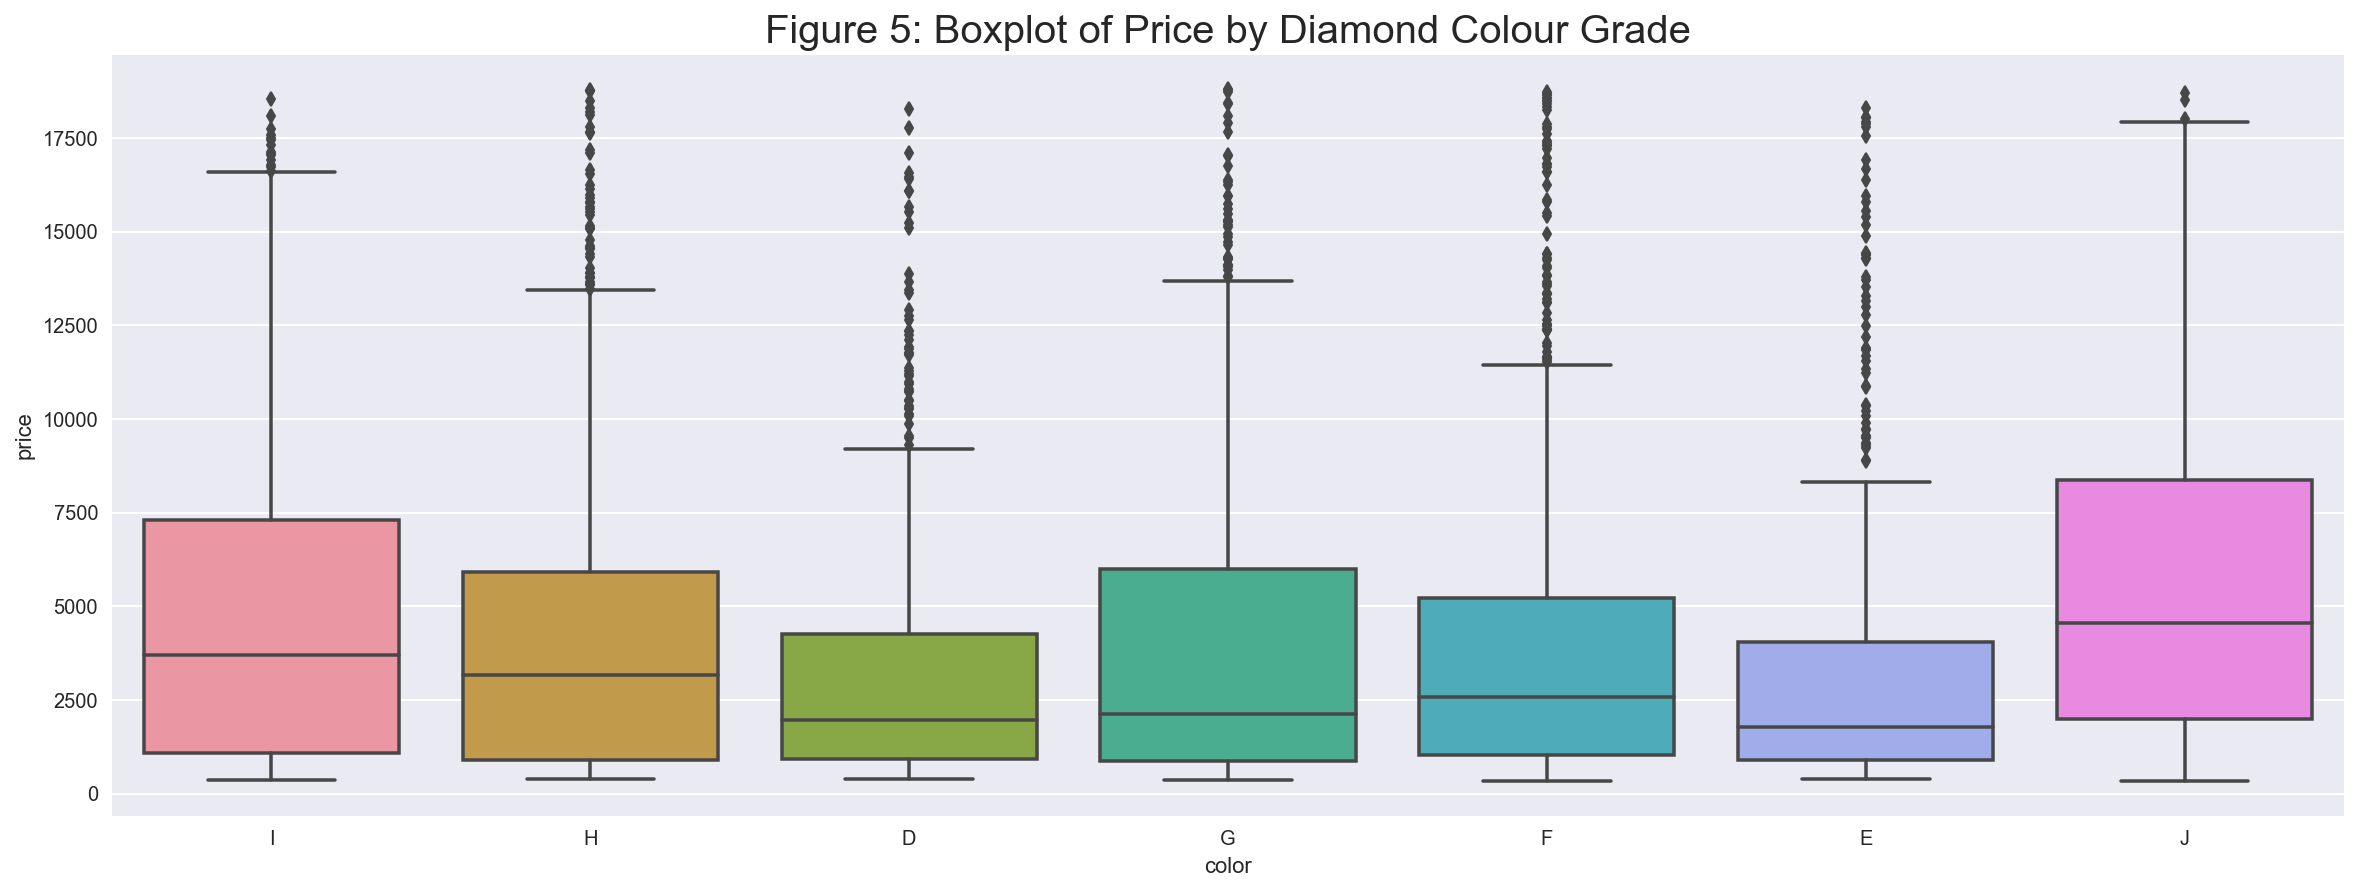

In [10]:
plt.figure(figsize = (20,7))
sns.boxplot(data = df, x="color", y="price")
plt.title('Figure 5: Boxplot of Price by Diamond Colour Grade', fontsize = 20)
plt.show()

<h4>Three-Variable Visualization</h4>
<h5>BARPLOT OF PRICE BY COLOUR AND CUT</h5>
Overall, we can see that the dataset has a large number of cut diamonds of "Premium" quality, with the "J" colour grade diamond being the most expensive. On the other hand, the dataset only has a small number of "Ideal" quality cut diamonds, and "E" is the diamond with the lowest price according to its colour grade.

Text(0, 0.5, 'Diamond Price')

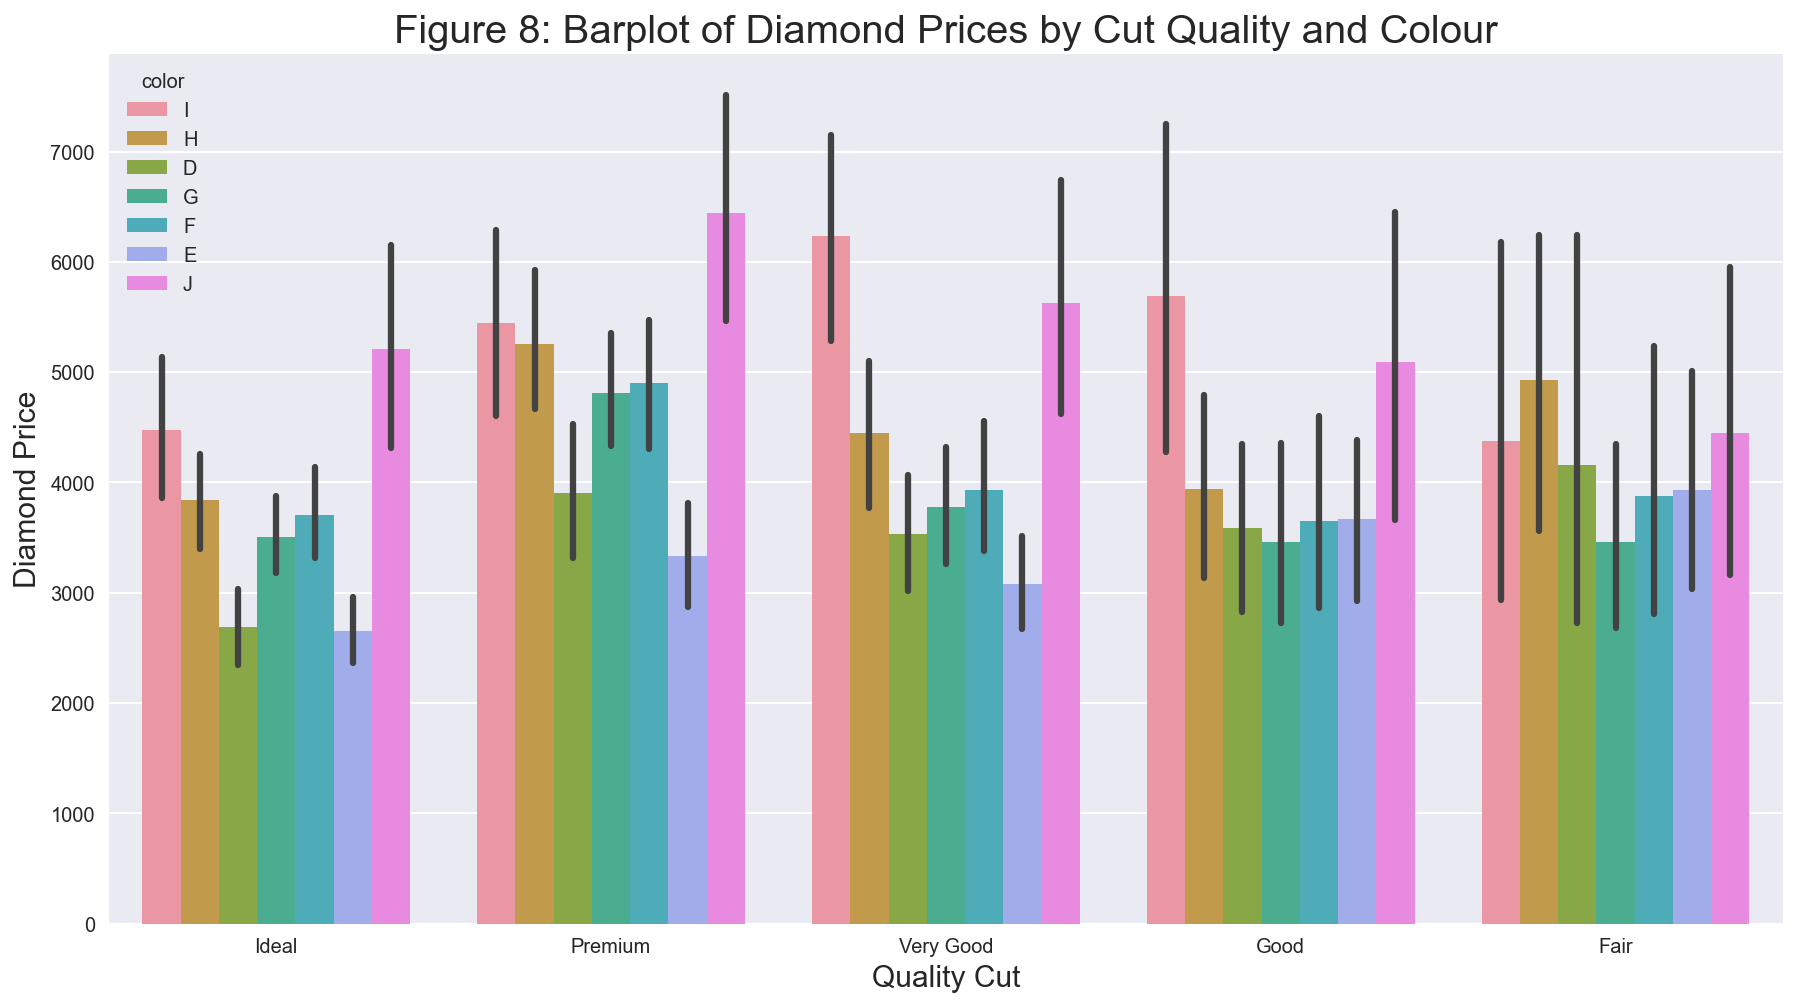

In [13]:
plt.figure(figsize = (15,8))
fig_4 = sns.barplot(x ='cut', y ='price', hue = 'color', data = df)
plt.title('Figure 8: Barplot of Diamond Prices by Cut Quality and Colour', fontsize = 20)
plt.xlabel('Quality Cut', fontsize = 15)
plt.ylabel('Diamond Price', fontsize = 15) 

<h3><b>Summary and Conclusion</b></h3>

<h3><b>References</b></h3>

<ul>
    <li>Akman, D. (2022). <i>Datasets</i>. Retrieved September 23, 2022, from <a href="https://github.com/akmand/datasets">https://github.com/akmand/datasets</a></li>
    <li>Akman, D., Yenice, Z., Wong, Y. K., Ture, I., & Malekipirbazari, M. (n.d). <i>Regression Case Study: Predicting Melbourne House Prices (Phase 1)</i>. Retrieved September 23, 2022, from <a href="https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-melbourne-1/">https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-melbourne-1/</a></li>
    <li>Moreno, G. (2018). <i>ggplot2 and Diamonds</i>. Retrieved September 23, 2022, from <a href="https://rpubs.com/GinaMoreno__/course1_4">https://rpubs.com/GinaMoreno__/course1_4</a></li>
</ul>